In [315]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [316]:
df1 = pd.read_csv(r'D:\data sets\Bengaluru_House_Data.csv')

In [317]:
df1.head(10)

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00
5,Super built-up Area,Ready To Move,Whitefield,2 BHK,DuenaTa,1170,2.0,1.0,38.00
6,Super built-up Area,18-May,Old Airport Road,4 BHK,Jaades,2732,4.0,NaN,204.00
7,Super built-up Area,Ready To Move,Rajaji Nagar,4 BHK,Brway G,3300,4.0,NaN,600.00
8,Super built-up Area,Ready To Move,Marathahalli,3 BHK,NaN,1310,3.0,1.0,63.25
9,Plot Area,Ready To Move,Gandhi Bazar,6 Bedroom,NaN,1020,6.0,NaN,370.00


In [318]:
df1.groupby('area_type')['area_type'].agg('count')

area_type
Built-up  Area          2418
Carpet  Area              87
Plot  Area              2025
Super built-up  Area    8790
Name: area_type, dtype: int64

In [319]:
# Get rid of unnecessary columns.

cols = ['area_type', 'availability', 'society','balcony']

df1 = df1.drop(columns = cols)

In [320]:
df1.head()

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00


In [321]:
df1.isnull().sum()

location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

In [322]:
df3 =df1.dropna()

In [323]:
df3.isnull().sum()

location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64

In [324]:
# I'll create a new column, that takes the number from size column, e.g '2 BHK' will be '2' in our new column.

df3['bhk'] = df3['size'].apply(lambda x : int(x.split(' ')[0]))

In [325]:
df3.head()

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3
4,Kothanur,2 BHK,1200,2.0,51.00,2


In [326]:
df3['bhk'].unique()

array([ 2,  4,  3,  6,  1,  8,  7,  5, 11,  9, 27, 10, 19, 16, 43, 14, 12,
       13, 18], dtype=int64)

In [327]:
df3[df3.bhk>20]

,location,size,total_sqft,bath,price,bhk
1718,2Electronic City Phase II,27 BHK,8000,27.0,230.0,27
4684,Munnekollal,43 Bedroom,2400,40.0,660.0,43


In [328]:
df3['total_sqft'].unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [329]:
# This function takes x (total_sqft column) and convert each data point to a float, 
# and returns False if it's not feasible.

def is_float(x):  
    try:
        float(x)
    except:
        return False
    return True
        

In [330]:
# The entries in the dataset where the total_sqft is not a float; using the (~).

df3[~df3['total_sqft'].apply(is_float)]   

,location,size,total_sqft,bath,price,bhk
30,Yelahanka,4 BHK,2100 - 2850,4.0,186.000,4
122,Hebbal,4 BHK,3067 - 8156,4.0,477.000,4
137,8th Phase JP Nagar,2 BHK,1042 - 1105,2.0,54.005,2
165,Sarjapur,2 BHK,1145 - 1340,2.0,43.490,2
188,KR Puram,2 BHK,1015 - 1540,2.0,56.800,2
...,...,...,...,...,...,...
12975,Whitefield,2 BHK,850 - 1060,2.0,38.190,2
12990,Talaghattapura,3 BHK,1804 - 2273,3.0,122.000,3
13059,Harlur,2 BHK,1200 - 1470,2.0,72.760,2
13265,Hoodi,2 BHK,1133 - 1384,2.0,59.135,2


In [331]:
# This function takes x (total_sqft) and takes the float average of the range data points.

def convert_sqft_to_num(x):
    tokens = x.split('-')
    if len(tokens) == 2:
        return (float(tokens[0]) + float(tokens[1]))/len(tokens)
    try:
        return float(x) #if the number is normal number the convert it into float then return it 
    except:
        return None # We return None here, if the value cannot be converted to float

In [332]:
#I'll create a new dataframe and apply the above function to the total_sqft column.

df4 = df3.copy()

df4.total_sqft = df4.total_sqft.apply(convert_sqft_to_num)

df4.head()

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3
4,Kothanur,2 BHK,1200.0,2.0,51.00,2


In [333]:
# Entries in the 30th index.
df4.loc[30]

location      Yelahanka
size              4 BHK
total_sqft       2475.0
bath                4.0
price             186.0
bhk                   4
Name: 30, dtype: object

In [334]:
df5 = df4.copy()

In [335]:
# A new column 'price per sqft'; the quotient of price/total_sqft.


df5['price_per_sqft'] = df5['price']*100000/df5['total_sqft'] # I multiply the price by 100000; 1 lakh = 100000
df5.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000


In [336]:
len(df5.location.unique())

1304

In [337]:
# Number of houses in each location.
df5.location = df5.location.apply(lambda x: x.strip())

location_stats = df5.groupby('location')['location'].agg('count').sort_values(ascending=False)
location_stats.head(30)

location
Whitefield                  535
Sarjapur  Road              392
Electronic City             304
Kanakpura Road              266
Thanisandra                 236
Yelahanka                   210
Uttarahalli                 186
Hebbal                      176
Marathahalli                175
Raja Rajeshwari Nagar       171
Bannerghatta Road           152
Hennur Road                 150
7th Phase JP Nagar          149
Haralur Road                141
Electronic City Phase II    131
Rajaji Nagar                106
Chandapura                   98
Bellandur                    96
KR Puram                     88
Hoodi                        88
Electronics City Phase 1     87
Yeshwanthpur                 85
Begur Road                   84
Sarjapur                     81
Kasavanhalli                 79
Harlur                       79
Hormavu                      74
Banashankari                 74
Ramamurthy Nagar             73
Kengeri                      73
Name: location, dtype: int64

In [338]:
# Number of locations that have <= 10 houses in the dataset.
len(location_stats[location_tally<=10]) 
# This is a series so this type of syntax works.

1052

In [339]:
sparse_locations = location_stats[location_stats<=10]
sparse_locations

location
Basapura                 10
1st Block Koramangala    10
Gunjur Palya             10
Kalkere                  10
Sector 1 HSR Layout      10
                         ..
1 Giri Nagar              1
Kanakapura Road,          1
Kanakapura main  Road     1
Karnataka Shabarimala     1
whitefiled                1
Name: location, Length: 1052, dtype: int64

In [340]:
len(df5.location.unique())

1293

In [341]:
# I'm creating a new location variable "other", for all the locations that have less than 10 houses.
df5.location = df5.location.apply(lambda x: 'others' if x in sparse_locations else x)
len(df5.location.unique())

242

There are some anomalies in the data where entries have a high bhk value and a low total_sqft
value. For example, the loc(9) of the above dataframe, bhk=6 and total_sqft=1020.
The square feet per bhk should be of a certain value that is comprehendable.
Normally you would ask your real estate manager for a good threshold to use.
I'll use 320# There are some anomalies in the data where entries have a high bhk value and a low total_sqft
value. For example, the loc(9) of the above dataframe, bhk=6 and total_sqft=1020.
The square feet per bhk should be of a certain value that is comprehendable.
Normally you would ask your real estate manager for a good threshold to use.
I'll use 300

In [342]:
# The entries in the dataset where the quotient of the total_sqft/bhk < 300.

df5[df5.total_sqft/df5.bhk < 300].head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
9,others,6 Bedroom,1020.0,6.0,370.0,6,36274.509804
45,HSR Layout,8 Bedroom,600.0,9.0,200.0,8,33333.333333
58,Murugeshpalya,6 Bedroom,1407.0,4.0,150.0,6,10660.980810
68,Devarachikkanahalli,8 Bedroom,1350.0,7.0,85.0,8,6296.296296
70,others,3 Bedroom,500.0,3.0,100.0,3,20000.000000


In [343]:
df5.shape

(13246, 7)

# Outlier filtering

In [344]:
# I create a new dataframe where I filter entries that have a (total_sqft/bhk) < 300

df6 = df5[~(df5.total_sqft/df5.bhk < 300)]

df6.shape

(12502, 7)

In [345]:
# Some statistical info about the price_per_sqft column.
df5['price_per_sqft'].describe()


count    1.320000e+04
mean     7.920759e+03
std      1.067272e+05
min      2.678298e+02
25%      4.267701e+03
50%      5.438331e+03
75%      7.317073e+03
max      1.200000e+07
Name: price_per_sqft, dtype: float64

# From the above we can see that there are houses that are overly cheap(min) and some that are overly expensive(max). Since I'm trying to build a generic model that will serve the larger majority,it will be fair to get rid of these extreme entries (outliers).

In [346]:
# I'll create a function that filters out overly expensive and overly cheap houses.

def filter_outliers1(df):
    ''' 
        This function takes the dataframe, and groupby the location.

        For each location, we calculate the mean and standard deviation of the 
        price_per_sqft in that location.

        Then we use the mean and standard deviation to filter entries that lie beyond some 
        specified threshold.
        
    '''
    df_out = pd.DataFrame()
    for key, sub_df in df.groupby('location'):
        m = np.mean(sub_df.price_per_sqft)
        sd = np.std(sub_df.price_per_sqft)
        reduced_df = sub_df[(sub_df.price_per_sqft>(m-sd))  & (sub_df.price_per_sqft<=(m+sd))]
        df_out = pd.concat([df_out, reduced_df], ignore_index = True)
    return df_out

In [347]:
df7 = filter_outliers1(df6)
df7.shape

(10241, 7)

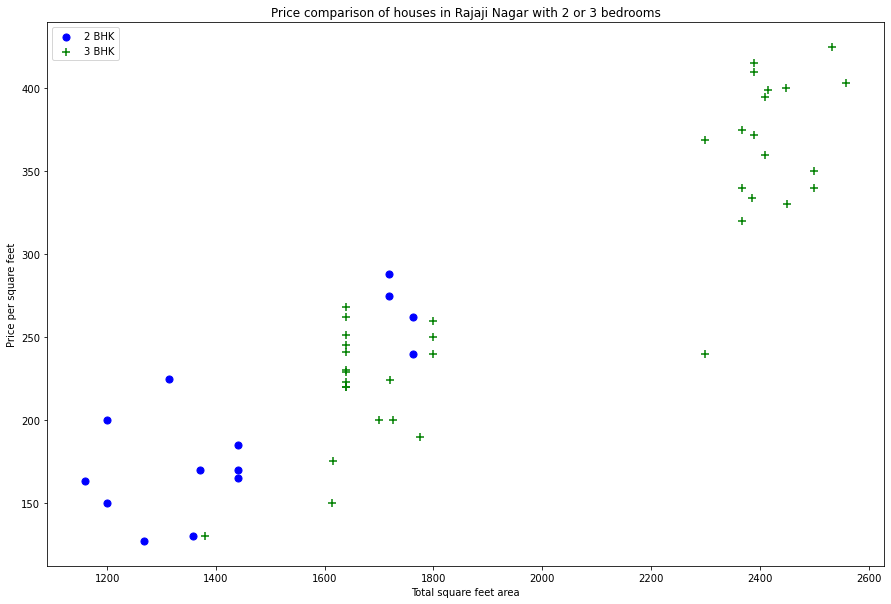

In [348]:
# Let's see how the prices of 2 bhk and 3 bhk vary in the same location

def scatter_plot(dataframe, location):
    plt.figure(figsize = (15,10))
    bhk2 = dataframe[(dataframe.location==location) & (dataframe.bhk==2)]
    bhk3 = dataframe[(dataframe.location==location) & (dataframe.bhk==3)]
    plt.scatter(bhk2.total_sqft, bhk2.price, color='b', label='2 BHK', s=50)
    plt.scatter(bhk3.total_sqft, bhk3.price, marker='+', color='g', label='3 BHK', s=50)
    plt.xlabel('Total square feet area')
    plt.ylabel('Price per square feet')
    plt.title(f'Price comparison of houses in {location} with 2 or 3 bedrooms')
    plt.legend()

scatter_plot(df7, 'Rajaji Nagar')

# 
See how some 3 bhk houses cost less than 2 bhk houses with the same total square feet area.
Normally you'll think that, in the same location, for more bhk, the price of a given house should
cost more than one with less bhk, provided the square feet area is fairly same.
So I'll go ahead and write a function that filters these outliers.

In [349]:
def filter_outliers2(dataframe):
    
    '''First, I create an array of indices of the outliers to filter/remove; filter_indices.
       
       Second, I group the dataframe by location; location_df
       
       Third, I create an empty dictionary 'bhk_info', and then group 'location_df' by 'bhk'
       
       Fourth, I get the mean and standard deviation of the price per square feet of all the
       house with a particular bhk, and in the same Location. Also the count of the houses.
       
       Finally, I'll pass the stats info to the dictionary and use the information in this
       bhk_info dictionary to get the indices of the entries where the price per square feet
       of a given house, in a given location with more bhk, is less than that of a house 
       with less bhk.
      '''
    filter_indices = np.array([])
    for location, location_df in dataframe.groupby('location'):
        bhk_info = {}
        for bhk, bhk_df in location_df.groupby('bhk'):
            bhk_info[bhk] = {
                'mean': np.mean(bhk_df.price_per_sqft),
                'std': np.std(bhk_df.price_per_sqft),
                'count': bhk_df.shape[0]
            }
        for bhk, bhk_df in location_df.groupby('bhk'):
            info = bhk_info.get(bhk-1)
            if info and info['count']>5: # Only ones greater than 5.
                filter_indices = np.append(filter_indices, 
                             bhk_df[bhk_df.price_per_sqft<(info['mean'])].index.values)
    return dataframe.drop(filter_indices, axis='index')

df8 = filter_outliers2(df7)
df8.shape
    

(7329, 7)

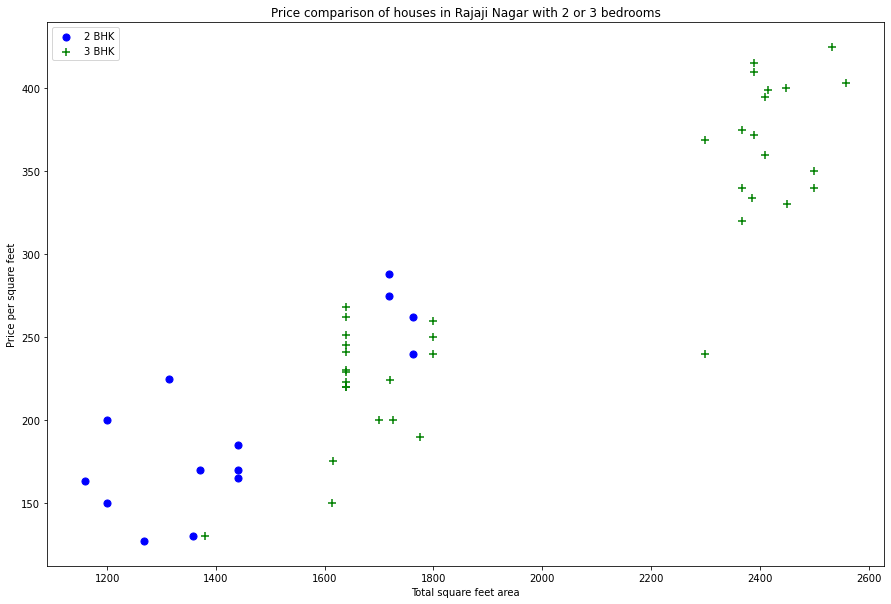

In [350]:
# I'd run the scatter plot function again to see how well we did with filtering the outlier. 
scatter_plot(df7, 'Rajaji Nagar')

Text(0, 0.5, 'count')

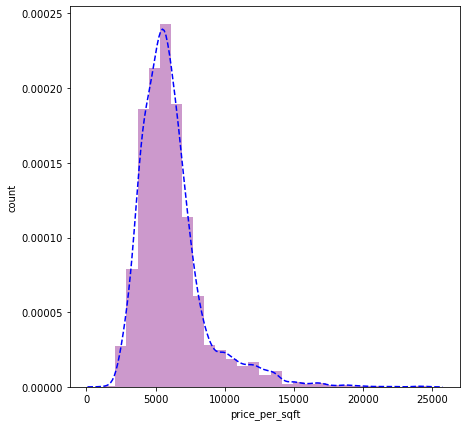

In [351]:
import seaborn as sns
plt.figure(figsize = (7,7))
sns.distplot(df8.price_per_sqft, color = 'purple' ,bins = 29,kde_kws = {'color' : 'b', 'lw' : 1.5, 'label' : 'KDE', 'linestyle' : "--"})
plt.xlabel('price_per_sqft')
plt.ylabel('count')

Text(0, 0.5, 'count')

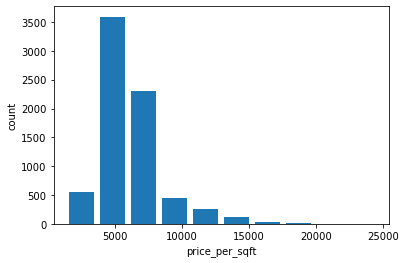

In [352]:
plt.hist(df8.price_per_sqft, rwidth = 0.8)
plt.xlabel('price_per_sqft')
plt.ylabel('count')

In [353]:
df8['bath'].unique()

array([ 4.,  3.,  2.,  5.,  8.,  1.,  6.,  7.,  9., 12., 16., 13.])

In [354]:
# The entries in the dataset where bath is greater than 10
df8[df8.bath > 10]

,location,size,total_sqft,bath,price,bhk,price_per_sqft
5277,Neeladri Nagar,10 BHK,4000.0,12.0,160.0,10,4000.000000
8486,others,10 BHK,12000.0,12.0,525.0,10,4375.000000
8575,others,16 BHK,10000.0,16.0,550.0,16,5500.000000
9308,others,11 BHK,6000.0,12.0,150.0,11,2500.000000
9639,others,13 BHK,5425.0,13.0,275.0,13,5069.124424


Text(0, 0.5, 'count')

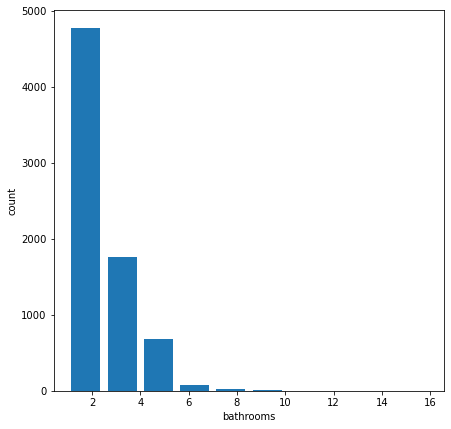

In [355]:
# I'll use a histogtram to see the most common number of bathrooms in the dataset

plt.figure(figsize = (7,7))
plt.hist(df8.bath, rwidth = 0.8)
plt.xlabel('bathrooms')
plt.ylabel('count')




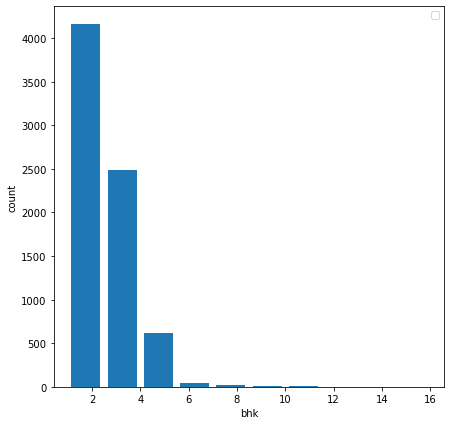

In [356]:
plt.figure(figsize = (7,7))
plt.hist(df8.bhk, rwidth = 0.8)
plt.xlabel('bhk')
plt.ylabel('count')

plt.legend(df8.bhk, df8.bath)

In [357]:
# I create a new dataframe where the number of the bathroom is not more than 
# the bhk+2(prefered threshold).

df8[(df8.bath) > (df8.bhk +2)]

,location,size,total_sqft,bath,price,bhk,price_per_sqft
1626,Chikkabanavar,4 Bedroom,2460.0,7.0,80.0,4,3252.032520
5238,Nagasandra,4 Bedroom,7000.0,8.0,450.0,4,6428.571429
6711,Thanisandra,3 BHK,1806.0,6.0,116.0,3,6423.034330
8411,others,6 BHK,11338.0,9.0,1000.0,6,8819.897689


In [358]:
df9 = df8[(df8.bath) < (df8.bhk+2)]

In [359]:
df9.shape

(7251, 7)


I used the price_per_sqft column to do alot of outlier filtering but I would have to drop
it as it won't be an important feature for training the regression model.
As well as the size column.# 

In [360]:
cols2 = ['size', 'price_per_sqft']
df10 = df9.drop(columns = cols2, axis = 1)
df10.head()

,location,total_sqft,bath,price,bhk
0,1st Block Jayanagar,2850.0,4.0,428.0,4
1,1st Block Jayanagar,1630.0,3.0,194.0,3
2,1st Block Jayanagar,1875.0,2.0,235.0,3
3,1st Block Jayanagar,1200.0,2.0,130.0,3
4,1st Block Jayanagar,1235.0,2.0,148.0,2


# 
There are over 200 locations in the dataset, and they are all string data type.
Machine learning models don't understand string for the most part, hence
I will use a one-hot encoding approach facilitated by pd.get_dummies, to create
a new dataframe of zeros and ones that represent the location in a certain way.
For example, if the location is 'Electric City', the 'Electric City' column will have a
value 1 and every other columns will be zeros.

In [361]:
dummies = pd.get_dummies(df10['location'])

In [362]:
# We concatenate our dummies-dataframe to out main dataframe.

df11 = pd.concat([df10, dummies.drop('others', axis = 'columns')], axis = 'columns')

In [363]:
df11.head()

,location,total_sqft,bath,price,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,1st Block Jayanagar,2850.0,4.0,428.0,4,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1st Block Jayanagar,1630.0,3.0,194.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1st Block Jayanagar,1875.0,2.0,235.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1st Block Jayanagar,1200.0,2.0,130.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1st Block Jayanagar,1235.0,2.0,148.0,2,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [364]:
df12 = df11.drop('location', axis = 1)

df12.head(10)

,total_sqft,bath,price,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4.0,428.0,4,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1630.0,3.0,194.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1875.0,2.0,235.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1200.0,2.0,130.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1235.0,2.0,148.0,2,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,2750.0,4.0,413.0,4,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,2450.0,4.0,368.0,4,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,1875.0,3.0,167.0,3,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,1500.0,5.0,85.0,5,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10,2065.0,4.0,210.0,3,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [365]:
x = df12.drop('price', axis = 1)
y = df12['price']

In [366]:
x.head()

,total_sqft,bath,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4.0,4,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1630.0,3.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1875.0,2.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1200.0,2.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1235.0,2.0,2,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [367]:
y.head()

0    428.0
1    194.0
2    235.0
3    130.0
4    148.0
Name: price, dtype: float64

In [368]:
from sklearn.model_selection import train_test_split

In [369]:
xtrain,xtest,ytrain,ytest = train_test_split(x, y, test_size = 0.15, random_state = 10)

In [370]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(xtrain,ytrain)

LinearRegression()

In [371]:
ypred = lin_reg.predict(xtest)

In [372]:
from sklearn.metrics import mean_squared_error

error = mean_squared_error(ytest, ypred)

error

844.1849212728148

In [373]:
accuracy = (lin_reg.score(xtest.values, ytest.values))*100

In [374]:
print(f'Accuracy of the model: {(accuracy):.1f}%')

Accuracy of the model: 84.1%


In [375]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

In [376]:
cv = ShuffleSplit(n_splits = 5, test_size = .10, random_state = 0)

cross_val_score(LinearRegression(), x, y, cv = cv)

array([0.82704825, 0.83249339, 0.82387742, 0.77312875, 0.8194513 ])

# 

GridSearchCV:-
This function helps to loop through predefined hyperparameters and fit your estimator (model) on your training set

In [377]:
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import Lasso

from sklearn.tree import DecisionTreeRegressor

In [382]:
def find_best_model_using_gridSearchCV(X,y):
    
    algos = {
        'linear regression ' : {
            
            'model' : LinearRegression(),
            'params' : {
                'normalize' : [True, False]
            }
        },
        'lasso' : {
            'model' : Lasso(),
            'params' : {
                'alpha' : [1,2],
                'selection' : ['random', 'cyclic']
            }
        },
        'decision tree' : {
            'model' : DecisionTreeRegressor(),
            'params' : {
                'criterion' : ['mse', 'friedman_mse'],
                'splitter' : ['best', 'random']
            }
        }
    }
    
    score = []
    cv = ShuffleSplit(n_splits = 5, test_size = .10, random_state = 0)
    for algos_names, config in algos.items():
        gs = GridSearchCV(config['model'], config['params'], cv = cv, return_train_score = False)
        gs.fit(X,y)
        score.append({
            'model' : algos_names,
            'best score' : gs.best_score_,
            'best params' : gs.best_params_
        })
    return pd.DataFrame(score, columns = ['model','best score','best params'])


In [383]:
find_best_model_using_gridSearchCV(x,y)

,model,best score,best params
0,linear regression,0.815200,{'normalize': False}
1,lasso,0.665725,"{'alpha': 2, 'selection': 'cyclic'}"
2,decision tree,0.739346,"{'criterion': 'mse', 'splitter': 'best'}"


In [398]:
# I've implemented a function that uses the model to predict price.

def predictPrice(location, sqft, bath, bhk):
    loc_index = np.where(x.columns==location)[0][0]  # Get index of the location passed
    
    
    i = np.zeros(len(x.columns)) # Create an array of zeros
    i[0] = sqft  # assign sqft as the first input
    i[1] = bath # assign bath as the second input
    i[2] = bhk  # assign bhk as the third input
    if loc_index > 0:
        i[loc_index] = 1 # assign 1 wherever the location should be in the array.
    return lin_reg.predict([i])[0] 

In [399]:
price = predictPrice('1st Block Jayanagar', 2000, 4, 5)
print(f"Price: {price:.2f}Lakh")

Price: 276.08Lakh


In [401]:
price = predictPrice('Indira Nagar', 2000, 4, 5)
print(f"Price: {price:.2f}Lakh")

Price: 265.89Lakh


In [402]:
price = predictPrice('Indira Nagar', 1000, 2, 2)
print(f"Price: {price:.2f}Lakh")

Price: 181.43Lakh


# import the model to pickle file

In [404]:
import pickle
with open('home_price_model.pickle', 'wb') as f:
    pickle.dump(lin_reg, f)

In [406]:
import json
columns = {
    'data_columns' : [col.lower() for col in x.columns]
}
with open('columns.json', 'w') as f:
    f.write(json.dumps(columns))